**# Credit Card Fraud Detection Capstone Project:**

Project Problem Statement:
The objective of this project is to develop a predictive model capable of identifying fraudulent credit card transactions. This model will be built and refined using a dataset provided by Worldline in conjunction with the Machine Learning Group, as part of a research collaboration.
The dataset, sourced from Kaggle, encompasses a total of 284,807 credit card transactions, of which 492 are identified as fraudulent. One of the primary challenges in this project arises from the highly imbalanced nature of the dataset, with a significantly smaller proportion of fraudulent transactions compared to legitimate ones. The focus will be on implementing and evaluating appropriate strategies to address this imbalance, ensuring the development of an effective and reliable predictive model for fraud detection.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
import pandas as pd

path = '/content/gdrive/MyDrive/creditcard.csv'
df = pd.read_csv(path)


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_columns', 500)

In [8]:
  df.shape

(284807, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Handling Missing Values**

In [11]:
df.isnull().sum().sum()

0

We can see there are no Null Values

**Checking the distribution of Classes**

In [12]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
# %age distribution
df['Class'].value_counts(normalize = True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

0 - **Non-Fradulant**  
1 - **Fraudulant**

***Interpretation***:  
There exist a problem of **Class Imbalance**

**Visualizing** **Graphically**

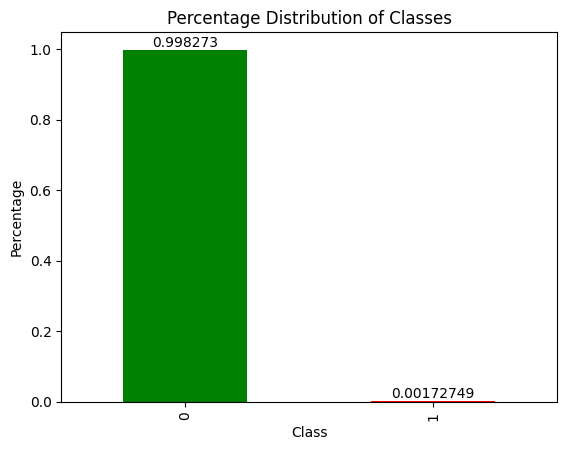

In [14]:
ax = df['Class'].value_counts(normalize = True).plot.bar(color = ['g', 'r'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Percentage Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

**Outliers treatment**

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

**Distribution of classes with time**

In [15]:
# creating fradulant dataframes
data_fraud = df[df['Class'] == 1]

# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

In [16]:
# validation 2 dataframes

print(data_fraud.shape)
print(data_non_fraud.shape)

(492, 31)
(284315, 31)


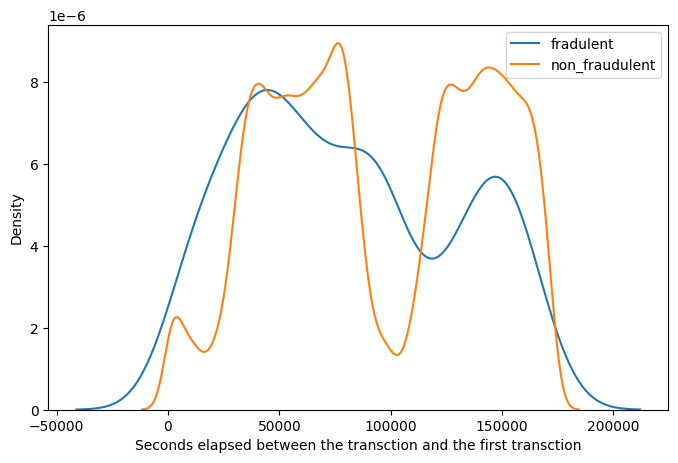

In [17]:
# distribution plot

plt.figure(figsize=(8, 5))
ax = sns.distplot(data_fraud['Time'], label='fradulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non_fraudulent', hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.legend(loc='best')
plt.show()

**Interpretation**  
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [18]:
# dropping the Time column
df.drop('Time', axis=1, inplace=True)

In [19]:
# validating the dataframe
df.shape

(284807, 30)

**Distribution of classes with amount**

In [20]:
df[df.Class==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

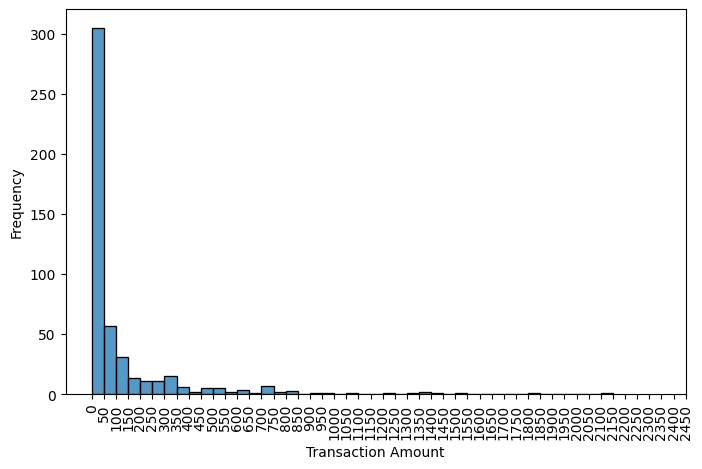

In [21]:
# distribution of Fradulent data

plt.figure(figsize=(8, 5))
sns.histplot(data_fraud['Amount'], binwidth=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xticks(range(0, 2500, 50), rotation=90)
plt.show()

**Interpretation:**

- Most of the fradulent transactions are in the range of 0-50 dollars
- Highest Fraud transaction was at between 2100-2150 dollars

**Train-Test Split**

In [22]:
# import library

from sklearn.model_selection import train_test_split

In [23]:
# putting all features in X
X = df.drop(['Class'], axis=1)

In [24]:
# assigning target variable to y
y = df['Class']

In [25]:
# validating the X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [26]:
# validating the assignment
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, stratify=y, random_state=42)

**Feature Scaling**

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [28]:
# importing the library for Standardization
from sklearn.preprocessing import StandardScaler

In [29]:
# Instantiate the Scaler
scaler = StandardScaler()

In [30]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [31]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,-0.184399,-0.222719,0.377643,0.386075,-0.650025,0.418040,-1.009056,0.225934,-0.738861,-0.068285,0.329703,-0.038329,-0.231385,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758,-0.321082
214082,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,-0.318277,0.517022,0.489890,0.247935,-1.055373,1.242616,-0.433066,-0.136620,-0.720880,0.328234,-0.016297,-0.030437,0.281190,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755,0.243475
106005,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,-1.288745,0.086419,-0.376936,0.191335,1.046362,0.420874,0.805190,-1.316514,0.059491,0.915477,-1.087435,2.189260,0.346463,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833,4.797594
58619,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,0.128383,0.009338,-0.341516,0.004210,-0.287098,1.385535,0.398955,-0.299877,0.403600,0.929925,0.225957,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,-0.331514
191638,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,0.474428,-0.283699,-0.331548,-0.180028,-0.254641,-0.388456,0.414223,0.048084,-0.710405,0.007241,-0.458141,0.154309,0.167939,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344,-0.331514


**Scaling the test set**

In [32]:
# transform the test set

X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
186882,-2.537331,1.890864,-0.840555,-1.102759,-2.105725,0.367811,-2.737844,-3.543314,-0.483147,0.112724,-1.612586,0.635855,0.406871,0.854371,0.505753,-0.947788,0.557331,1.546638,-0.789047,-1.959611,4.328165,-2.167329,1.022567,-0.241143,-1.094885,-0.475427,-0.177157,-0.082691,-0.201469
165754,-0.250839,1.104108,0.206089,0.417324,1.204079,-0.350694,1.369769,-0.133535,-0.957100,-0.261170,0.244248,0.418555,-0.475202,0.658159,-1.274781,-0.621563,-0.397771,0.178173,0.604366,-0.128120,0.133048,0.499501,-0.392572,-0.393364,0.233354,-0.490717,0.143897,0.136810,-0.312626
235285,0.568980,-2.520416,-1.114138,1.670652,-1.128945,0.398822,0.190403,0.161493,0.840595,0.099172,0.520022,-0.251312,-2.279548,0.893064,0.503413,0.875849,-0.824311,0.837538,-0.555301,1.039287,0.318037,-0.760732,-0.181332,0.595866,-0.760920,-1.048927,-0.096970,0.088686,2.416826
101271,1.328892,0.226908,-0.308968,0.381772,0.238490,-0.282946,0.029460,-0.079962,0.227173,-0.267319,-1.431070,-0.578758,-0.188827,-0.236694,1.270649,0.919639,-0.475997,0.241545,0.329519,-0.050933,-0.379270,-1.148959,-0.047403,-1.074464,0.375683,0.182045,-0.031732,0.017501,-0.290023
5832,1.124863,-0.165691,1.337053,1.030033,-0.891116,0.202926,-0.825094,0.163280,2.301808,-0.641129,0.334222,-2.299609,1.066235,1.177166,-0.218823,-0.129612,0.870825,-0.336065,-0.600662,-0.196966,-0.216512,-0.195607,0.072785,0.045625,0.135192,0.308617,0.001142,0.017673,-0.281092


**Checking the Skewness**

In [33]:
# listing all columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

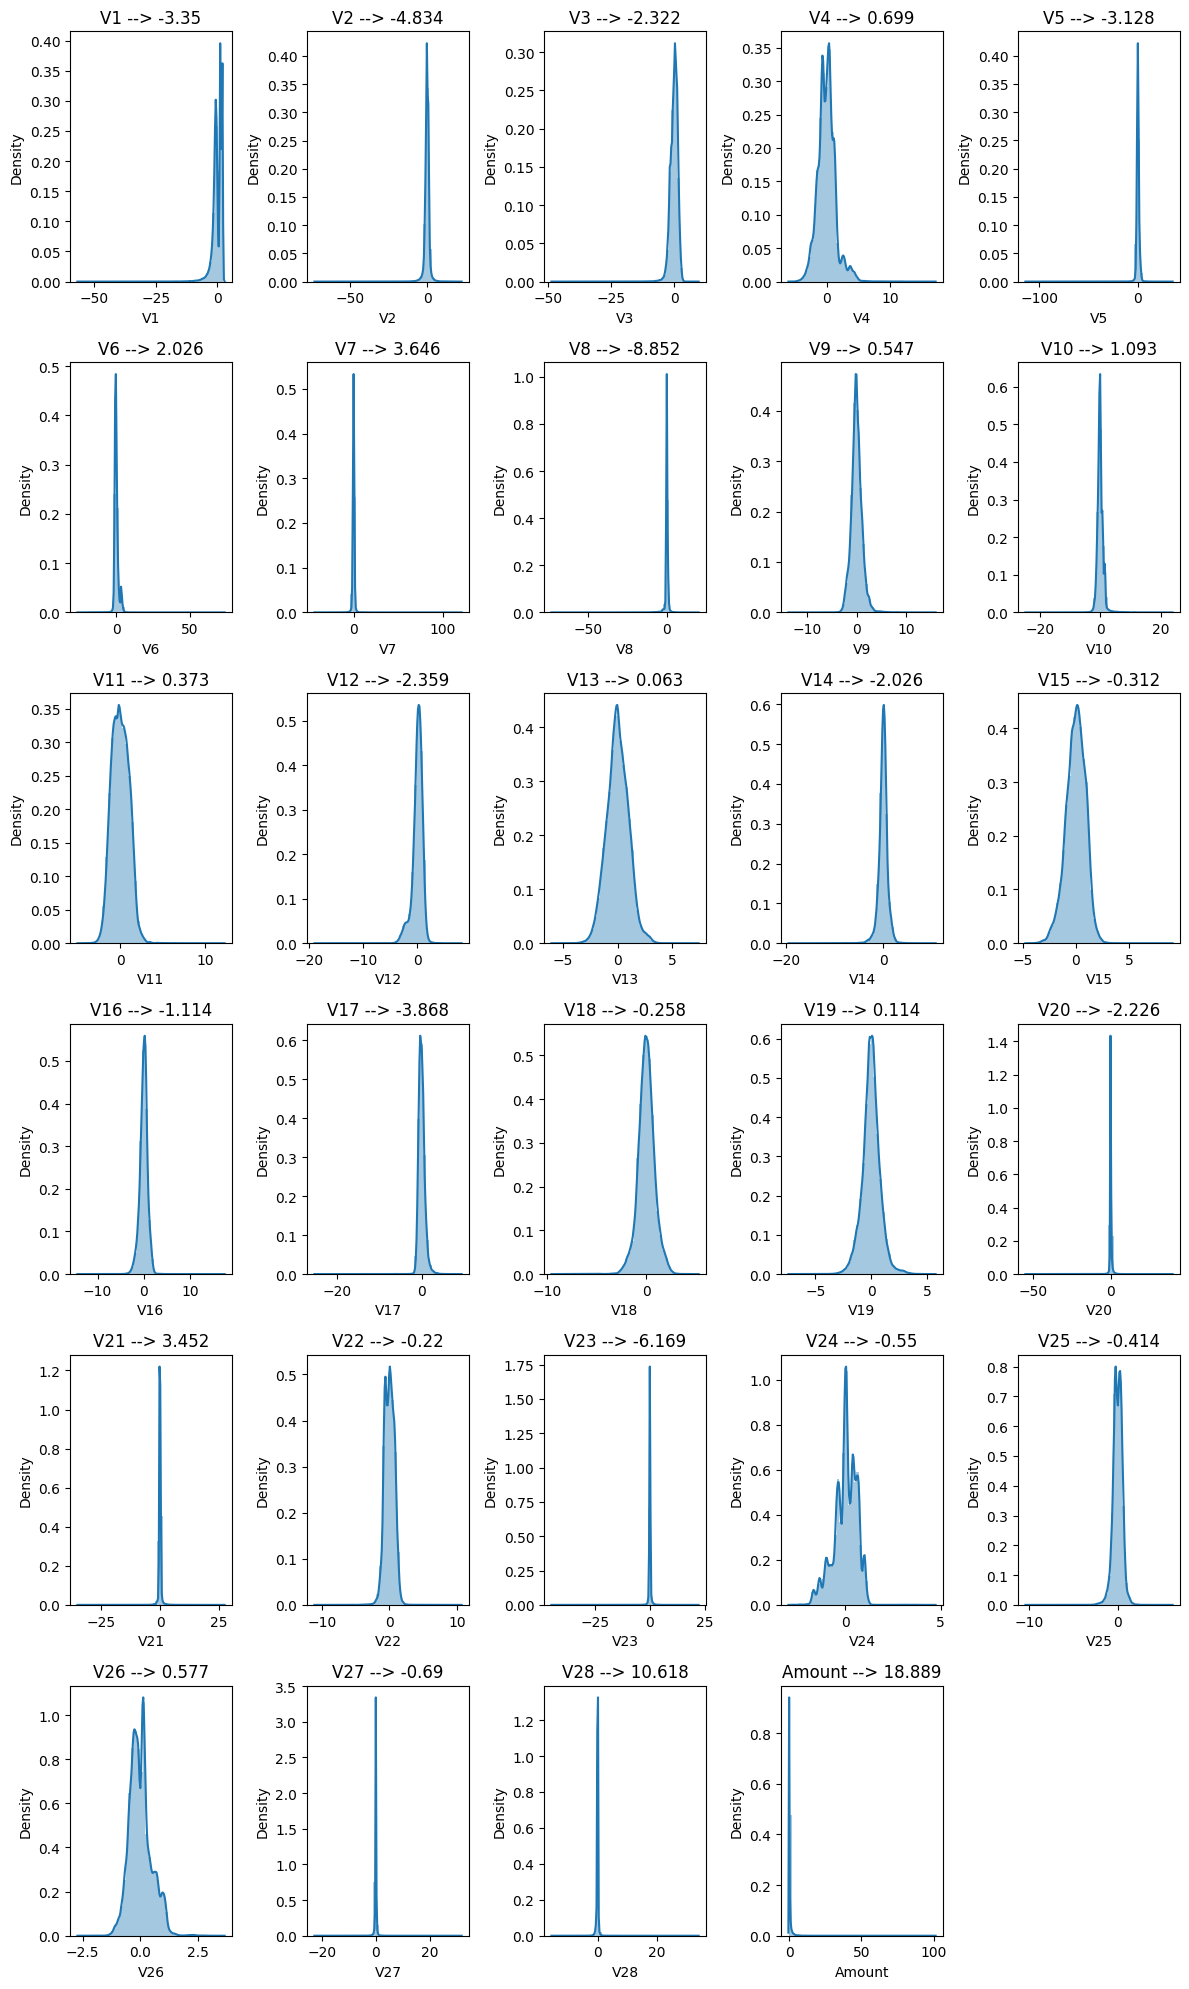

In [34]:
# Plotting the distribution of the variables (skewness) of all the columns

k=0
plt.figure(figsize=(12, 20))
for col in cols:
  k=k+1
  plt.subplot(6, 5, k)
  sns.distplot(X_train[col])
  plt.tight_layout()
  plt.title(col + ' --> ' + str(round(X_train[col].skew(), 3)))

- We see that there are many variables, which are heavily skewed.  
- Therefore we'll be working to mitigate the skewness and transform to them into normal distribution

**Mitigate skweness with PowerTransformer**

In [35]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [36]:
# Transform the test set
X_test = pt.transform(X_test)

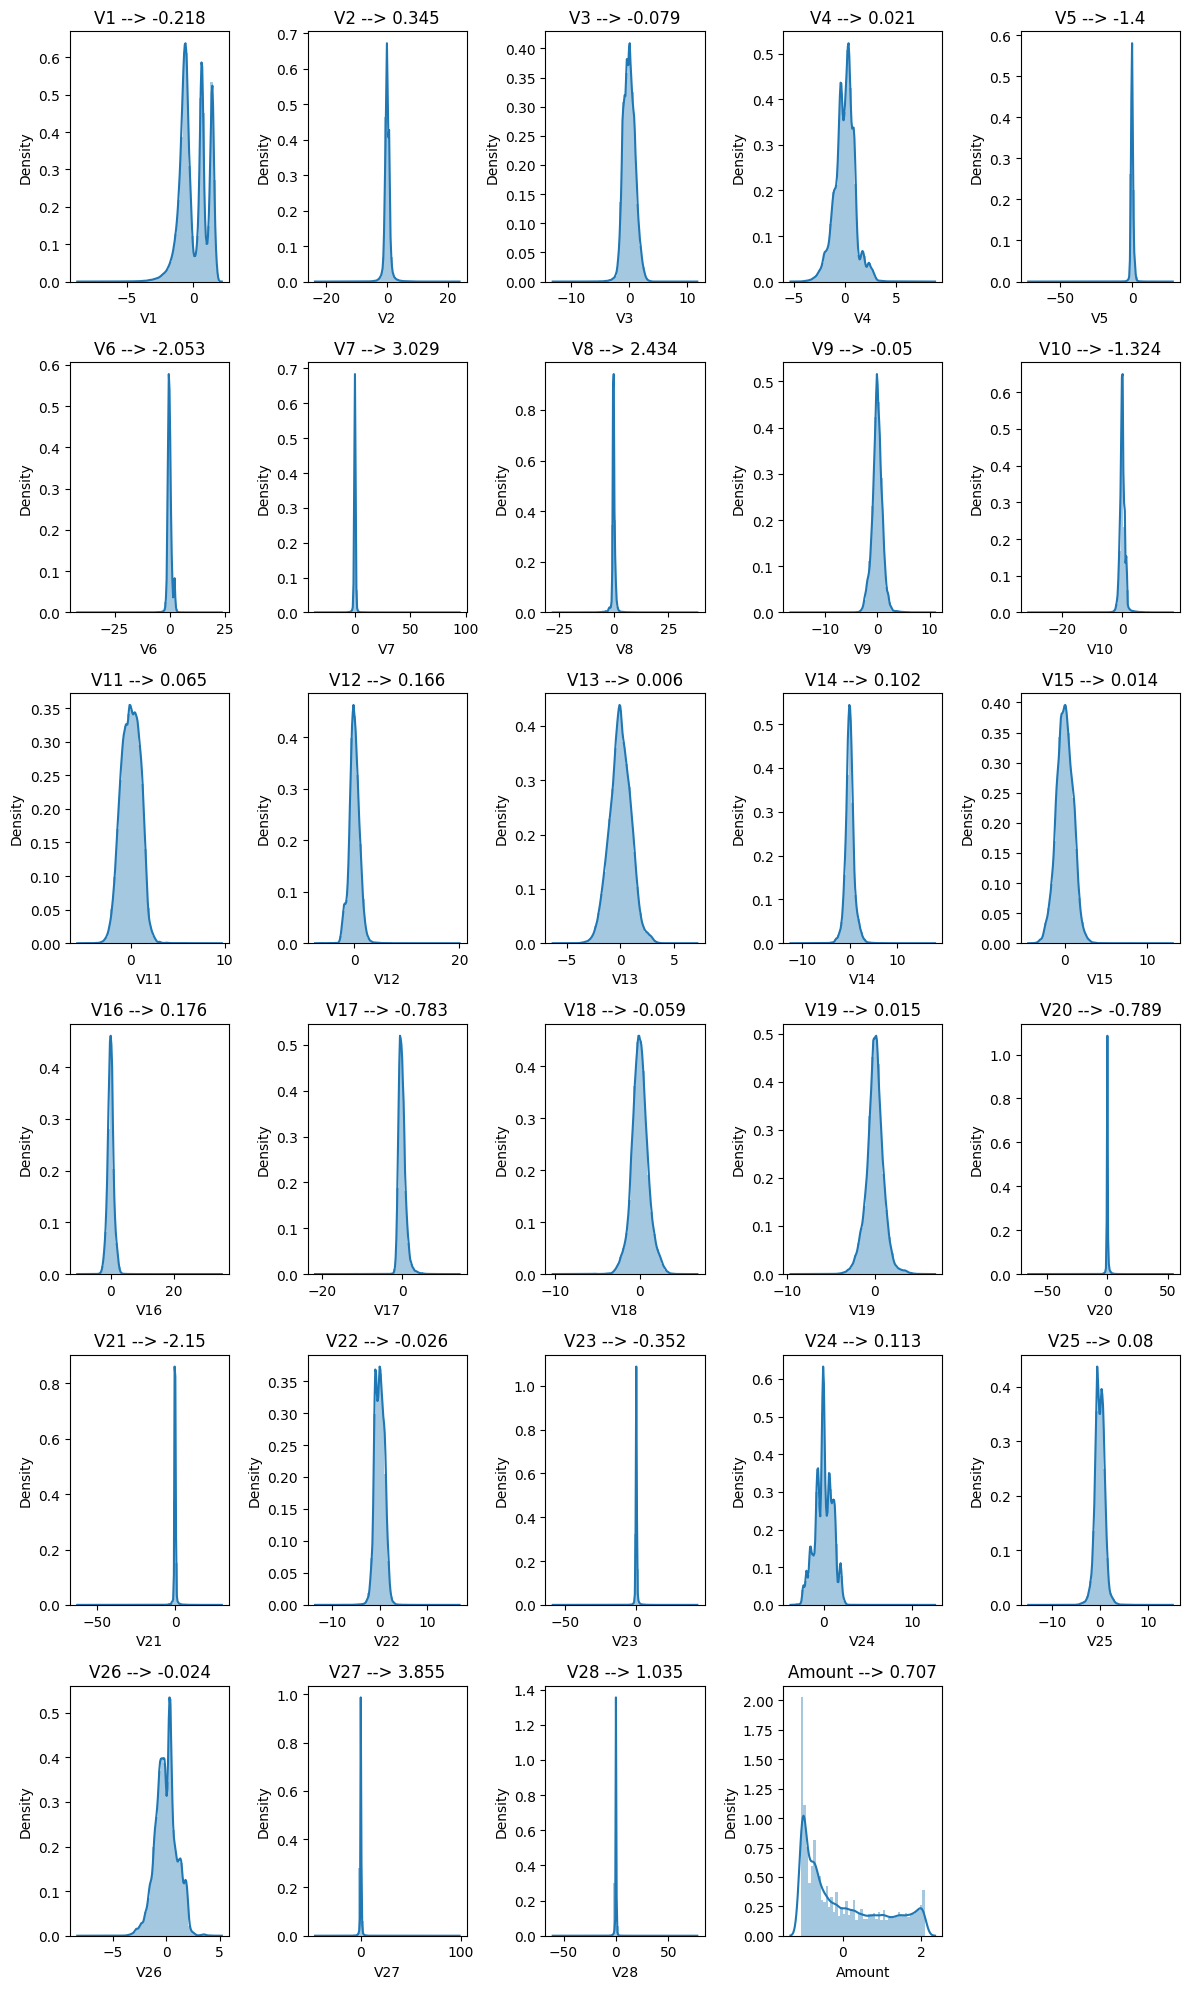

In [37]:
# Now Validating the distribution of the variables (skewness) of all the columns

k=0
plt.figure(figsize=(12, 20))
for col in cols:
  k=k+1
  plt.subplot(6, 5, k)
  sns.distplot(X_train[col])
  plt.tight_layout()
  plt.title(col + ' --> ' + str(round(X_train[col].skew(), 3)))

- Now we can see that all the variables seem to be normallly distributed after transformation

## **Model building on imbalanced data**

**Metric selection for heavily imbalanced data. Here are some Noteworthy points to be discussed.**

- As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model.
- Because If the model always predicts the same class (1 or 0) for all the data points, it will result in an accuracy of more than 99%.
- Hence, we have to measure the ROC-AUC score for fair evaluation of the model.

- In other words, accuracy alone may not be a reliable performance metric when dealing with imbalanced datasets. It can be misleading, as it does not capture the model's ability to correctly identify the minority class.  

- In such scenarios ROC curve  is used to used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds.

- The default threshold of **0.5** is not always the ideal threshold to find the best **classification label** of the **test point**. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low.

- After determining the **optimal threshold**, we can calculate the **F1 score** of the classifier to measure the **precision** and **recall** at the selected threshold.

**Why SVM was not tried for model building and for few cases Random Forest was not tried ?**  
- In the dataset we have 284,807 datapoints and in the case of Oversampling we would have even more number of data points.
- SVM is not very efficient with large number of data points beacuse it takes lot of computational power and resources to make the transformation.
- When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming.
- Hence, because of the unavailablity of the required resources and time, SVM was not tried.

**Why KNN was not used for model building?**  
- KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points.
-  It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

**Logistic regression**

In [38]:
# importing the logistic regression module
from sklearn.linear_model import LogisticRegression

In [39]:
# importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

**Tuning hyperparameter C**
- Regularization is a technique used to prevent overfitting in machine learning models. It adds a penalty term to the loss function, discouraging complex models that fit the training data too closely.
- A smaller value of C corresponds to stronger regularization, meaning the model will be more constrained and have simpler decision boundaries. This can help prevent overfitting but may lead to underfitting if set too low.
- On the other hand, a larger value of C reduces the strength of regularization, allowing the model to fit the training data more closely. This can potentially improve performance on the training set, but it may also increase the risk of overfitting.

In [40]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [41]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, random_state=4, shuffle=True)

# specify params
params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring ='roc_auc',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

In [42]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [43]:
# results of GridSearchCV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.647226,0.034748,0.027704,0.005005,0.01,{'C': 0.01},0.994970,0.982690,0.970501,0.993970,0.976481,0.983722,0.009590,1,0.984436,0.988452,0.990826,0.985024,0.986544,0.987057,0.002342
1,0.901452,0.034361,0.023992,0.001644,0.1,{'C': 0.1},0.992936,0.979420,0.970119,0.995823,0.979909,0.983642,0.009480,2,0.985116,0.988245,0.990107,0.984366,0.985881,0.986743,0.002127
2,1.538530,0.357453,0.031494,0.010438,1,{'C': 1},0.992249,0.978358,0.968759,0.996223,0.979867,0.983091,0.009945,3,0.984815,0.987668,0.989583,0.983875,0.985321,0.986252,0.002082
3,1.017143,0.062880,0.025336,0.004148,10,{'C': 10},0.992175,0.978227,0.968587,0.996268,0.979825,0.983016,0.010008,4,0.984769,0.987581,0.989507,0.983813,0.985249,0.986184,0.002073
4,1.394430,0.388547,0.038901,0.013547,100,{'C': 100},0.992166,0.978215,0.968565,0.996272,0.979825,0.983009,0.010015,5,0.984765,0.987572,0.989498,0.983806,0.985241,0.986176,0.002072
5,1.129992,0.205534,0.023222,0.000635,1000,{'C': 1000},0.992165,0.978214,0.968562,0.996272,0.979823,0.983007,0.010016,6,0.984765,0.987571,0.989497,0.983804,0.985240,0.986176,0.002072


In [44]:
cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'mean_fit_time', 'mean_score_time', 'mean_train_score']]

,params,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,mean_train_score
0,{'C': 0.01},0.983722,0.009590,1,0.647226,0.027704,0.987057
1,{'C': 0.1},0.983642,0.009480,2,0.901452,0.023992,0.986743
2,{'C': 1},0.983091,0.009945,3,1.538530,0.031494,0.986252
3,{'C': 10},0.983016,0.010008,4,1.017143,0.025336,0.986184
4,{'C': 100},0.983009,0.010015,5,1.394430,0.038901,0.986176
5,{'C': 1000},0.983007,0.010016,6,1.129992,0.023222,0.986176


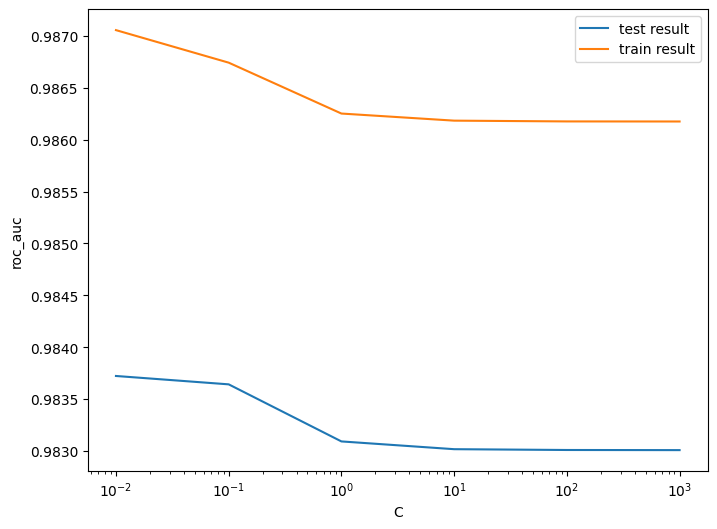

In [45]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper right')
plt.xscale('log')

In [46]:
# best score
best_score = model_cv.best_score_
best_score

0.9837222270065269

In [47]:
# best params
best_params = model_cv.best_params_['C']
best_params

0.01

In [48]:
print(f"Best Score: {best_score}")
print(f"Best Params: {best_params}")

Best Score: 0.9837222270065269
Best Params: 0.01


**Logistic regression with optimal C**

In [49]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [50]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

**Prediction on the train set**

In [51]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [52]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

array([[198998,     22],
       [   131,    213]])

In [53]:
TN = confusion_matrix[0,0] # True negative
FP = confusion_matrix[0,1] # False positive
FN = confusion_matrix[1,0] # False negative
TP = confusion_matrix[1,1] # True positive

In [54]:
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

# F1 score
print("F1-score:", f1_score(y_train, y_train_pred))

Accuracy: 0.9992325595393351
Sensitivity: 0.6191860465116279
Specificity: 0.9998894583458949
F1-score: 0.7357512953367875


In [55]:
# classification_report
print(classification_report(y_train, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



**ROC on the train set**

In [56]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [57]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]
y_train_pred_proba

array([0.00014499, 0.00038312, 0.00057989, ..., 0.00048833, 0.00045125,
       0.00026289])

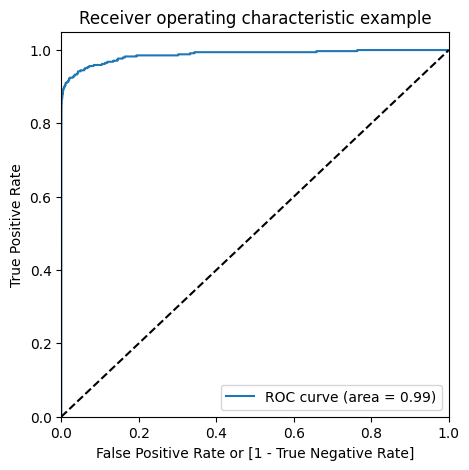

In [58]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

We acheived very good ROC 0.99 on the train set.

**Lets do Prediction on the test set**

In [59]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [60]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85281    14]
 [   61    87]]


In [61]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [62]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9991222218320986
Sensitivity:- 0.5878378378378378
Specificity:- 0.9998358637669266
F1-Score:- 0.6987951807228916


In [63]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.59      0.70       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443



**ROC on the test set**

In [64]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

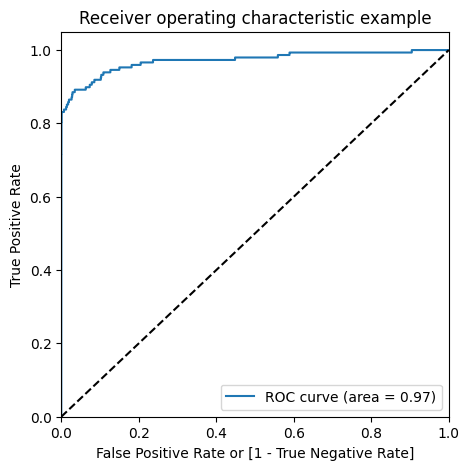

In [65]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very **good ROC** on the **test set** i.e. **0.97**

**Model summary** (***Logistic Regression***)

- **Train set**
  - Accuracy = 0.99
  - Sensitivity = 0.62
  - Specificity = 0.99
  - F1-Score = 0.73
  - ROC = 0.99

- **Test set**
  - Accuracy = 0.99
  - Sensitivity = 0.59
  - Specificity = 0.99
  - F1-Score = 0.70
  - ROC = 0.97


**Overall, the model is performing well in the test set**

# **XGBoost**

In [66]:
# Importing XGBoost
from xgboost import XGBClassifier

**Hyperparameter Tuning**

In [67]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
               'subsample': [0.3, 0.6, 0.9]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [68]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.208662,1.726072,0.115292,0.003425,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.968849,0.980627,0.972742,0.974073,0.004900,5,0.999902,0.999885,0.999902,0.999896,0.000008
1,4.287709,1.821233,0.113087,0.001464,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.972602,0.981552,0.983711,0.979289,0.004809,1,0.999964,0.999984,0.999990,0.999979,0.000011
2,4.142279,1.787133,0.113599,0.000346,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.972958,0.984406,0.979955,0.979106,0.004712,2,0.999955,0.999969,0.999979,0.999968,0.000010
3,4.114427,0.803406,0.149696,0.045164,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.962868,0.968037,0.973444,0.968116,0.004318,6,0.999990,1.000000,0.999999,0.999997,0.000004
4,4.382078,1.811231,0.116220,0.000639,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969425,0.982261,0.980061,0.977249,0.005605,3,1.000000,1.000000,1.000000,1.000000,0.000000
5,4.262629,1.793542,0.116975,0.002083,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.968497,0.979108,0.978425,0.975343,0.004849,4,1.000000,1.000000,1.000000,1.000000,0.000000


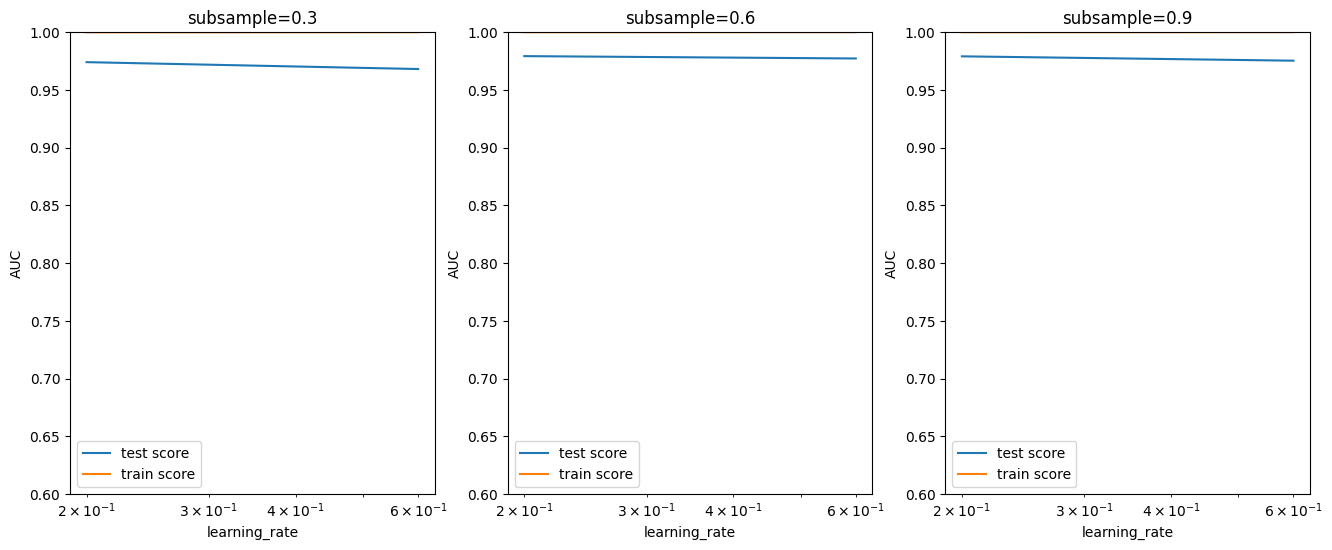

In [69]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')

In [70]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [71]:
# chosen hyperparameters
# 'objective':'binary:logistic' which outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

**Prediction on the train set**

In [72]:
# prediction on train set
y_train_pred = xgb_imb_model.predict(X_train)

In [73]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[199020      0]
 [     0    344]]


In [74]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [76]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [77]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [78]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

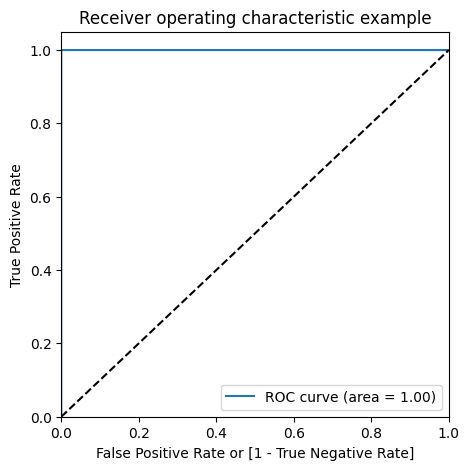

In [79]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

**Prediction on the test set**

In [80]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [81]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85287     8]
 [   36   112]]


In [82]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [83]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9994850368081645
Sensitivity:- 0.7567567567567568
Specificity:- 0.9999062078668152
F1-Score:- 0.835820895522388


In [84]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [85]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [86]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9685324620593394

**ROC of Test set**

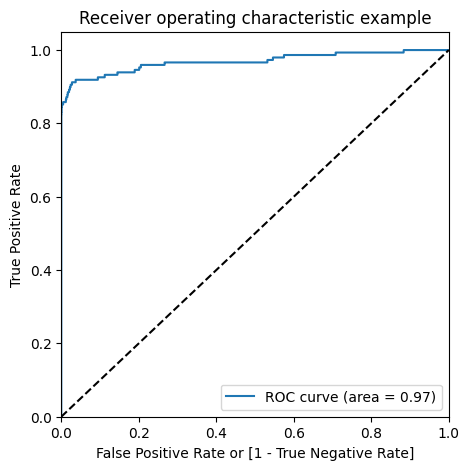

In [87]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (xGBoost)**

- **Train set**

  - Accuracy = 0.99
  - Sensitivity = 0.62
  - Specificity = 0.99
  - F1-Score = 0.99
  - ROC_AUC = 0.99

- **Test set**

  - Accuracy = 0.99
  - Sensitivity = 0.77
  - Specificity = 0.99
  - F1-Score = 0.85
  - ROC_AUC = 0.97

Model is seemingly well performing on test set as well.

# **Decision Tree**

In [88]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [89]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [90]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.435288,0.907427,0.024251,0.005638,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.930095,0.945270,0.936129,0.937164,0.006238,2
1,3.985157,0.594643,0.023716,0.004750,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.930088,0.945270,0.927363,0.934240,0.007878,7
2,3.654134,0.075169,0.025192,0.006173,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.938053,0.936631,0.935985,0.936890,0.000864,5
3,4.011864,0.574238,0.024917,0.005732,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.938053,0.936650,0.935985,0.936896,0.000862,4
4,7.753300,0.890343,0.026218,0.005000,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.961018,0.968046,0.906244,0.945103,0.027627,1
5,7.379079,0.226768,0.029278,0.004797,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.961032,0.968047,0.880563,0.936547,0.039690,6
6,7.667484,0.704080,0.030175,0.005720,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.926023,0.962117,0.906096,0.931412,0.023186,8
7,7.405873,0.156856,0.026274,0.005949,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.943187,0.962110,0.906059,0.937119,0.023282,3


In [91]:
grid_search.best_score_

0.9451025334972792

In [92]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [93]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

**Prediction on the train set**

In [94]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [95]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[198982     38]
 [   118    226]]


In [96]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992175116871652
Sensitivity:- 0.6569767441860465
Specificity:- 0.9998090644156367
F1-Score:- 0.743421052631579


In [98]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.86      0.66      0.74       344

    accuracy                           1.00    199364
   macro avg       0.93      0.83      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [99]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [100]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9642430686526772

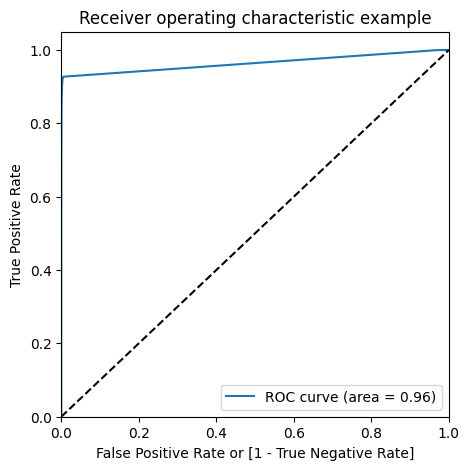

In [101]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Prediction on the test set

In [102]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [103]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85272    23]
 [   58    90]]


In [104]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9990519995786665
Sensitivity:- 0.6081081081081081
Specificity:- 0.9997303476170936
F1-Score:- 0.743421052631579


In [106]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.61      0.69       148

    accuracy                           1.00     85443
   macro avg       0.90      0.80      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [107]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [108]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9205109690850355

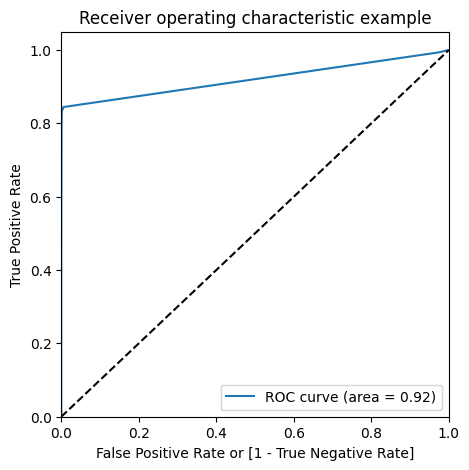

In [109]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**(***Decision Tree***)

- **Train set**
  - Accuracy = 0.99
  - Sensitivity = 0.66
  - Specificity = 0.99
  - F1-Score = 0.74
  - ROC-AUC = 0.95

- **Test set**
  - Accuracy = 0.99
  - Sensitivity = 0.61
  - Specificity = 0.99
  - F1 Score = 0.74
  - ROC-AUC = 0.92

**Random forest**

In [110]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'max_depth': range(5,10,5) ,
    'min_samples_leaf': [50, 100],
    'min_samples_split': [50, 100],
    'n_estimators': [100,200],
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                                        max_depth = 5,
                                        max_features = 10,
                                        min_samples_leaf = 50,
                                        min_samples_split = 100,
                                        n_estimators = 200)

In [ ]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

**Prediction on the train set**

In [ ]:
# predictions on train test
y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

**Prediction on the test set**

In [ ]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** (***Random Forest***)

- **Train set**
  - Accuracy = 0.99
  - Sensitivity = 0.71
  - Specificity = 0.99
  - F1-Score = 0.79
  - ROC-AUC = 0.98
- **Test set**
  - Accuracy = 0.99
  - Sensitivity = 0.67
  - Specificity = 0.99
  - F1 Score = 0.79
  - ROC-AUC = 0.95

# **Choosing best model on the imbalanced data**

- We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well.
- More specifically **Logistic regression** and **XGBoost** performed best in terms of **ROC-AUC score**.
- But if we were to choose one of them ,  we can go for the best as **XGBoost** which gives us **ROC** score of **1.0** on the **train data** and **0.97** on the **test data**.

**Print the FPR,TPR & select the best threshold from the roc curve for the best model**

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)

threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

We can see that the **threshold** is **0.85**, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

# **Handling Class imbalance**

As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.



Resampling Techniques:

- Undersampling: Randomly reduce the majority class instances to match the minority class size.
- Oversampling: Duplicate or generate synthetic instances of the minority class to match the majority class size.
- SMOTE (Synthetic Minority Over-sampling Technique): Create synthetic minority class instances by interpolating between neighboring instances.
- ADASYN (Adaptive Synthetic Sampling): Generate synthetic instances in regions where the minority class is difficult to learn.

**Why Undersampling is not preferred in Industry**

- Undersampling is not always preferred because it reduces the size of the majority class, potentially leading to loss of important information and decreased performance on the majority class.
- Additionally, undersampling may discard potentially valuable information from the majority class, leading to an incomplete understanding of the problem
-  If the dataset is already small, undersampling can further reduce the dataset size, which can lead to overfitting and poor generalization performance of the model.

**SMOTE** **(Synthetic Minority Oversampling Technique)**

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# instantiate SMOTE
sm = SMOTE(random_state=27)

# fitting the SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [ ]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

**We will start with Model building after balancing data with SMOTE**

# **Logistic Regression** (by SMOTE)

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

In [ ]:
print(model_cv.best_score_)
print(model_cv.best_params_['C'])

In [ ]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=100)

In [ ]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

**Prediction on the train set**

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

**Prediction on the test set**

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

**ROC on the test set**

In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(Logistic with SMOTE)**

**Train set**
- Accuracy = 0.95
- Sensitivity = 0.92
- Specificity = 0.98
- ROC = 0.99

**Test set**
- Accuracy = 0.97
- Sensitivity = 0.90
- Specificity = 0.99
- ROC = 0.97

# **XGBoost**(by SMOTE)

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')

We see that the train score almost touches to 1

In [ ]:
model_cv.best_params_

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

**Prediction on the train set**

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

**Prediction on the test set**

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(xGBoost)**

**Train set**
- Accuracy = 0.99
- Sensitivity = 1.0
- Specificity = 0.99
- ROC-AUC = 1.0

**Test set**
- Accuracy = 0.99
- Sensitivity = 0.82
- Specificity = 0.99
- ROC-AUC = 0.97

# **Decision Tree** (by SMOTE)

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_estimator_

In [ ]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

**Prediction on the train set**

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

**Prediction on the test set**

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(Decision Tree)**

**Train set**
- Accuracy = 0.98
- Sensitivity = 0.99
- Specificity = 0.98
- ROC-AUC = 0.99

**Test set**
- Accuracy = 0.98
- Sensitivity = 0.80
- Specificity = 0.98
- ROC-AUC = 0.90

## **AdaSyn (Adaptive Synthetic Sampling)**

In [ ]:
# importing adasyn
from imblearn.over_sampling import ADASYN

In [ ]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter

# Before sampling class distribution
print('Before sampling class distribution:', Counter(y_train))

# New class distribution
print('New class distribution:', Counter(y_train_adasyn))

# **Logistic Regression** (with Adasyn)

In [ ]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
print(model_cv.best_score_)
print(model_cv.best_params_)

**Logistic regression with optimal C**

In [ ]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [ ]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

**Prediction on the train set**

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

In [ ]:
 # Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the test set**

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(Logistic Regression with Adasyn)**

**Train set**
- Accuracy = 0.91
- Sensitivity = 0.89
- Specificity = 0.92
- ROC = 0.97

**Test set**
- Accuracy = 0.92
- Sensitivity = 0.90
- Specificity = 0.92
- ROC = 0.97

# **XGBoost (with Adasyn)**

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')

In [ ]:
model_cv.best_params_

In [ ]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

**Prediction on the train set**

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the test set**

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(xGBoost with Adasyn)**

**Train set**
- Accuracy = 1
- Sensitivity = 1
- Specificity = 1
- ROC-AUC = 1

**Test set**
- Accuracy = 0.99
- Sensitivity = 0.80
- Specificity = 0.99
- ROC-AUC = 0.97

# **Decision Tree**

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_estimator_

In [ ]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

**Prediction on the train set**

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the test set**

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(Decision Tree with Adasyn)**

**Train set**
- Accuracy = 0.97
- Sensitivity = 0.99
- Specificity = 0.95
- ROC-AUC = 0.99

**Test set**
- Accuracy = 0.96
- Sensitivity = 0.84
- Specificity = 0.96
- ROC-AUC = 0.93

**Choosing best model on the balanced data**

- Here we balanced the data with two of the best approaches we have SMOTE and Adasyn. With every data balancing thechnique we built several models such as **Logistic**, **XGBoost**, **Decision Tree**, and **Random Forest**.

- SMOTE and Adasyn models performed well. Among those models, the simplist model Logistic regression has **ROC score** **0.99** in the **train set** and **0.97** on the **test set**.

- We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

- Hence, we can conclude that the **Logistic regression model with SMOTE** is the best model for its simplicity and less resource requirement.

**Print the FPR,TPR & select the best threshold from the roc curve for the best model**

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

We can see that the **threshold** is **0.40**, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## **Cost benefit analysis**


- We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.
- But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not.
- For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure, the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.
- We also have to consider that for little change of the ROC score how much monetary loss or gain the bank get.If the amount is huge then we have to consider building the complex model even though the cost of building the model is high.


# **Summary to the business**

- For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

- For banks having a larger transaction value,if a model has low recall, it means that it is failing to detect a significant number of actual fraudulent transactions (false negatives)

- So we have to consider the losses if the transaction was a high-value fraudulent one.

- So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

- After performing several models, we have seen that in the balanced dataset with SMOTE technique, the **Logistic regression** model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.